### Task 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!


Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


```
A - подсудимый виновен

B - у него редкая группа крови (0.01)

Он должен был оценить апостериорную вероятность того, что подсудимый виновен при условии наличия редкой группы крови

P(A | B) = P(B | A) * P(A) / P(B), 

где 

P(B) = P(B | A)*P(A) + P(B | ~A)*P(~A)

Однако прокурор не учел, что редкая группа крови могла встретиться и у человека, который невиновен (P(B | ~A)), и априорную вероятность вины (P(A))

Прокурор оценил только вероятность P(A | ~B), которую рассчитал как P(A | ~B) = 1 - P(B) 
```

### Task 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.


```
Адвокат оценил вероятность того, что если взять случайного человека с редкой группой кровью среди всех граждан с редкой группой, то этот человек будет убийцей. По формальной логике, для таких заявлений адвокат должен был рассчитать апостериорную вероятность того, что подсудимый приступник по формуле байеса:
P(A | B) = P(B | A)* P(A) / P(B) = 1 * 10^(-6) / 10^(-2) = 10^(-4) = 0.01%


Вероятность у адвоката получилась ровно такой, как и апостериорная вероятность того, что человек с редкой группой крови - убийца.
```

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

def compute_posterior(data, prior_prob=0.01, test_success_1=0.95, test_success_2=0.95):
    if data == 1:
        return (prior_prob * test_success_1) / (prior_prob * test_success_1 + (1-prior_prob) * (1-test_success_1))
    elif data == 0:
        return (prior_prob * (1-test_success_2)) / (prior_prob * (1-test_success_2) + (1-prior_prob) * test_success_2)
    else:
        return None


In [12]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0.95, 1, 0.001)

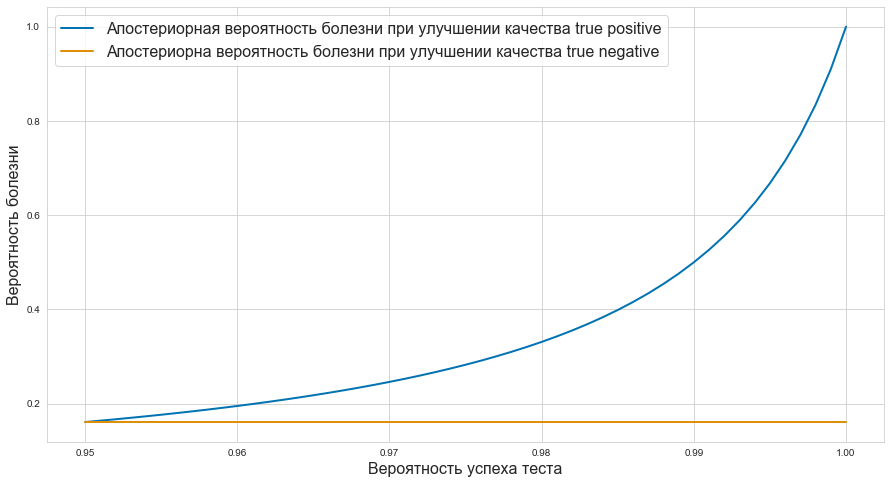

In [15]:

ys_one = vector_posterior(1, test_success_1=xs)
ys_zero = vector_posterior(1, test_success_2=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Апостериорная вероятность болезни при улучшении качества true positive')
ax.plot(xs, ys_zero, linewidth=2, label=r'Апостериорна вероятность болезни при улучшении качества true negative')
ax.set_xlabel('Вероятность успеха теста', fontsize=legend_fontsize)
ax.set_ylabel('Вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

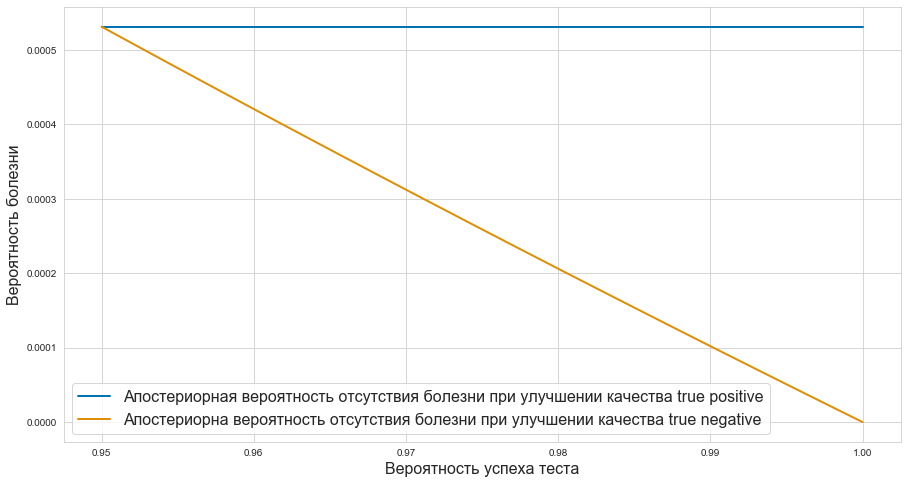

In [16]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0.95, 1, 0.001)


ys_one = vector_posterior(0, test_success_1=xs)
ys_zero = vector_posterior(0, test_success_2=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Апостериорная вероятность отсутствия болезни при улучшении качества true positive')
ax.plot(xs, ys_zero, linewidth=2, label=r'Апостериорна вероятность отсутствия болезни при улучшении качества true negative')
ax.set_xlabel('Вероятность успеха теста', fontsize=legend_fontsize)
ax.set_ylabel('Вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

По графикам видно, что при улучшении качества теста на верное распознавание болезни вероятность ее апостериорного наличия растет по функции, напоминающей параболу, а при улучшении качества теста на ложное распознавание вероятность действительно падает.

Учитывая то, что важнее распознать короновирус правильно и изолировать человека, чтобы он не заражал остальных, более правильным решением будет улучшить качество распознавания, таким образом увеличить охват действительно забольшевших людей (recall). Это решение аргументировано и большим увеличением апостериорной вероятности и бэграундом задачи.